In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../src/utils")
from utils import SimpleGraphVoltDatasetLoader, read_and_prepare_data
from torch_geometric_temporal.signal import temporal_signal_split
import torch

In [3]:
trafo_id = "T1330"

In [5]:
dfs = read_and_prepare_data(trafo_id)

In [9]:
dfs, mean_and_std = dfs

In [11]:
dfs

{'edges_static_data':      from_node_id  to_node_id  length_km  r_ohm_per_km  x_ohm_per_km  \
 0              94         110  -0.167420     -0.562549     -0.027228   
 1             100         110  -0.427878     -0.562549     -0.027228   
 2             103         110  -0.413408     -0.054951      0.250450   
 3             103         104  -0.456818     -0.468438      0.250450   
 4               6           7   0.367968     -0.562549     -0.027228   
 ..            ...         ...        ...           ...           ...   
 109            29           0   2.466107     -0.943999     -0.582581   
 110            19           0   2.364817     -0.847885     -0.443742   
 111            25           0   1.742611     -0.562549     -0.027228   
 112            12           0  -0.876446     -0.975035     -0.443743   
 113            12           0  -0.876446     -0.975035     -0.443743   
 
      max_i_ka     d_mm2  
 0    0.255013  0.211420  
 1    0.255013  0.211420  
 2   -0.494527 -0.50

In [12]:
df_m = dfs['measurements']
df_e = dfs['edges_static_data']

In [16]:
df_m.head()

,node_id,power_production,power_consumption,PMO,TR,junction,date_time,voltage,temperature_2m,snow_depth,...,direct_radiation,diffuse_radiation,direct_normal_irradiance,active_power,reactive_power,year,month,day,hour,minute
0,0,-0.669711,-0.211164,0,1,0,2021-06-01 00:00:00,0.871501,-0.087913,-0.373525,...,-0.563245,-0.758562,-0.682145,7.244788,5.311676,-1.301898,-0.152567,-1.673503,-1.661325,-1.341641
1,0,-0.669711,-0.211164,0,1,0,2021-06-01 00:15:00,0.837781,-0.099327,-0.373525,...,-0.563245,-0.758562,-0.682145,6.153428,4.436051,-1.301898,-0.152567,-1.673503,-1.661325,-0.447214
2,0,-0.669711,-0.211164,0,1,0,2021-06-01 00:30:00,0.977922,-0.110742,-0.373525,...,-0.563245,-0.758562,-0.682145,5.999126,4.542649,-1.301898,-0.152567,-1.673503,-1.661325,0.447214
3,0,-0.669711,-0.211164,0,1,0,2021-06-01 00:45:00,0.581175,-0.122156,-0.373525,...,-0.563245,-0.758562,-0.682145,5.541044,3.210176,-1.301898,-0.152567,-1.673503,-1.661325,1.341641
4,0,-0.669711,-0.211164,0,1,0,2021-06-01 01:00:00,0.501061,-0.133570,-0.373525,...,-0.563245,-0.758562,-0.682145,5.786962,3.941133,-1.301898,-0.152567,-1.673503,-1.516862,-1.341641


<Axes: >

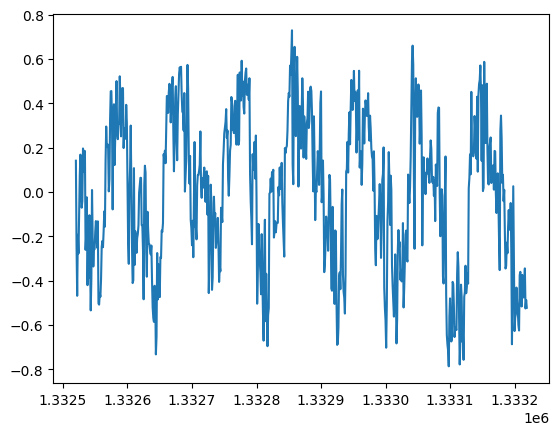

In [28]:
mum = 70
i = 50
for id, df in df_m.groupby('node_id'):
    i += 1
    df.sort_values('date_time', inplace=True)
    df1 = df
    if i == mum:
        break
df1
df1.voltage[1000:1700].plot()

In [29]:
loss1, loss2 = ([13935.423528898507, 13669.731327224523, 13639.281207058579, 13538.779053321108, 13598.731338899583, 13556.978689096868, 13580.511032041162, 13544.242470290512, 13495.533254571259, 13485.712078854442, 13500.238066241145, 13578.046470951289, 13541.541304644197, 13526.170534037054, 13463.419296219945, 14279.261159095913, 13575.148344356567, 13534.172764658928, 13512.6421190314, 13477.358242794871, 13505.311157103628, 13535.492070293054, 13532.618491034955, 13525.86669287458, 13575.099120033905, 13490.320809438825, 13465.822855178267, 13515.554843470454, 13498.659682337195, 13464.113192986697, 13489.278611954302, 13538.798815339804, 13544.609995212406, 13400.889460019767, 13488.660582777113, 13453.0644736588, 13427.621874637902, 13465.27007240057, 13388.737662974745, 13436.369224308059], [58481.791240133345, 13322.210551016033, 45086.24915743619, 22594.25053628534, 20378.071279481053, 39982.94915533811, 47524.47771515697, 28022.500560760498, 15230.015990927815, 19586.51805470884, 19422.150795780122, 24173.75753094256, 21279.935471959412, 19533.82257181406, 27946.34531056136, 18123.175150729716, 19404.1513306275, 20108.69200412929, 17436.03923559189, 10427.589882783592, 15113.483282141387, 16978.004410095513, 13021.55162204057, 16885.120564997196, 8532.849846191704, 5842.635185785592, 6779.637034550309, 4448.12233774364, 3858.283915758133, 3738.015515565872, 3822.2212362214923, 4060.575718857348, 3692.84817443043, 3803.374927908182, 4220.2158022373915, 4144.375340566039, 4053.0632117539644, 3922.703370973468, 3847.434072315693, 3951.516265809536])

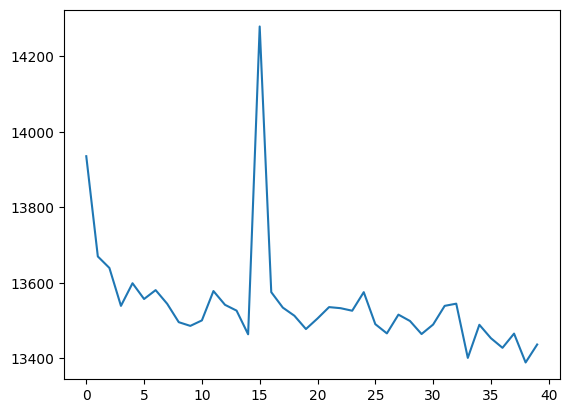

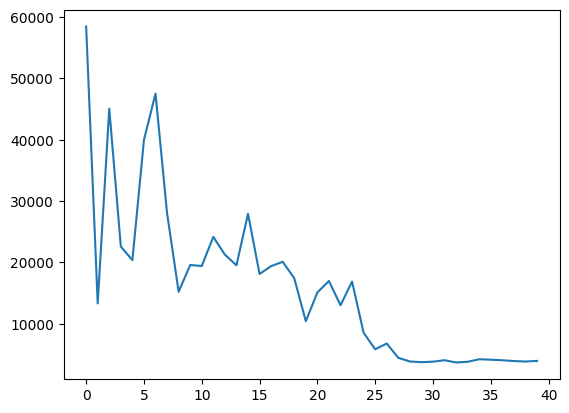

In [31]:
import matplotlib.pyplot as plt
plt.plot(loss1)
plt.show()
plt.plot(loss2)
plt.show()